In [69]:
# Importing Libraries

import numpy as np
import pandas as pd


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.linear_model     import LogisticRegression
from sklearn.ensemble         import RandomForestClassifier
from sklearn.model_selection  import train_test_split,StratifiedShuffleSplit
from sklearn.metrics          import classification_report,confusion_matrix,auc,roc_auc_score,roc_curve,precision_score,recall_score





In [22]:
# Data Read.
# Data source = https://www.kaggle.com/mlg-ulb/creditcardfraud
df = pd.read_csv("creditcard.csv")

### Explatory Data Analysis

In [23]:
# Time column = Number of seconds elapsed between this transaction and the first transaction in the dataset
# AMount column = Amount of transaction
# class = 0=> Not Fraud , 1 =>Fraud
# V columns (column #1 to 29) => undisclosed (private) 

shape = df.shape
print("shape of data = ",shape)
Feature_Size = len(df.columns)
Class_Index = Feature_Size -1 
print("Feature_Size = ",Feature_Size)
print("Target Index = ",Class_Index)
df.head()



shape of data =  (284807, 31)
Feature_Size =  31
Target Index =  30


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [25]:
Num_of_Fraud = round(df['Class'].value_counts()[1]/len(df)*100,3)
Num_of_NonFraud = round(df['Class'].value_counts()[0]/len(df)*100,3)


print("Number of Fraud Values :\t\t  \t   ",df['Class'].value_counts()[1])
print("Number of Non Fraud Values :\t\t        ",df['Class'].value_counts()[0])
print("\n")
print("Percentage of Fraud transactions :  \t\t ", Num_of_Fraud)
print("Percentage of Normal(Non-Fraud) transactions :  ",Num_of_NonFraud)


Number of Fraud Values :		  	    492
Number of Non Fraud Values :		         284315


Percentage of Fraud transactions :  		  0.173
Percentage of Normal(Non-Fraud) transactions :   99.827


Pie Chart:


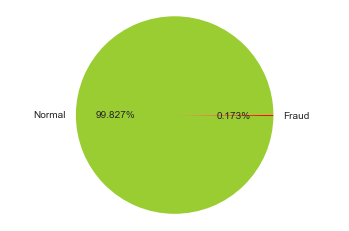

In [26]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud

print("Pie Chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.3f%%', labels=['Normal','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')


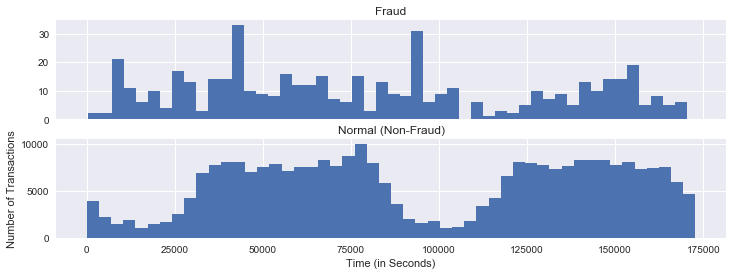

In [27]:
# now checking Time value in case of Fraud and Normal Transaction compared according to Number of transactions.

fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

axis_1.hist(df.Time[df.Class == 1], bins = bins)
axis_1.set_title('Fraud')

axis_2.hist(df.Time[df.Class == 0], bins = bins)
axis_2.set_title('Normal (Non-Fraud)')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

# We can see that in both cases , feature time looks similar. but if we look carefully, we can see that Normal 
# transactions are kind of uniformly distributed whereas the shape of Fraud transaction is not

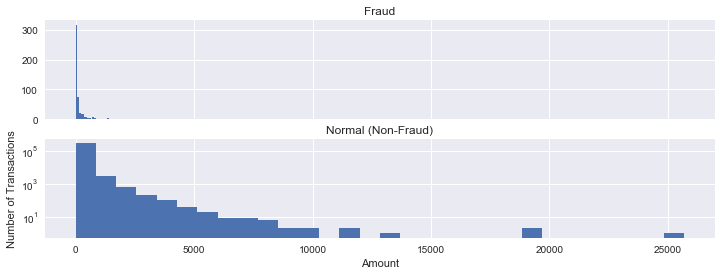

In [28]:
# now checking Amount in case of Fraud and Normal Transaction compared according to Number of transactions.

fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

axis_1.hist(df.Amount[df.Class == 1], bins = bins)
axis_1.set_title('Fraud')

axis_2.hist(df.Amount[df.Class == 0], bins = bins)
axis_2.set_title('Normal (Non-Fraud)')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale("log")
plt.show()

# we can see here that fraud transactions are of smaller amount. but this cant be used solely because normal transactions 
# too have a lot of transactions of smaller amount. so this kind of helps in a sense that we can say that if the amount
# is not large then its 'probably' not a fraud transaction, but obviously, fraud and normal transactions cant be 
# distinguished only according to amount.

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


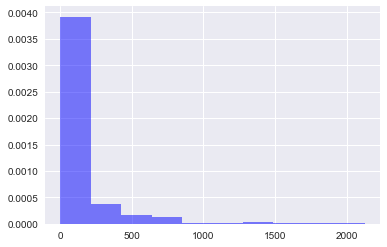

In [29]:
# Fraud data looks interesting , lets look into it a bit more
# lets see the transaction amount in case Fraud at a smaller scale.

print(df.Amount[df.Class == 1 ].describe())
plt.hist(df.Amount[df.Class == 1 ], 10, normed=1, facecolor='blue', alpha=0.5)
plt.show()

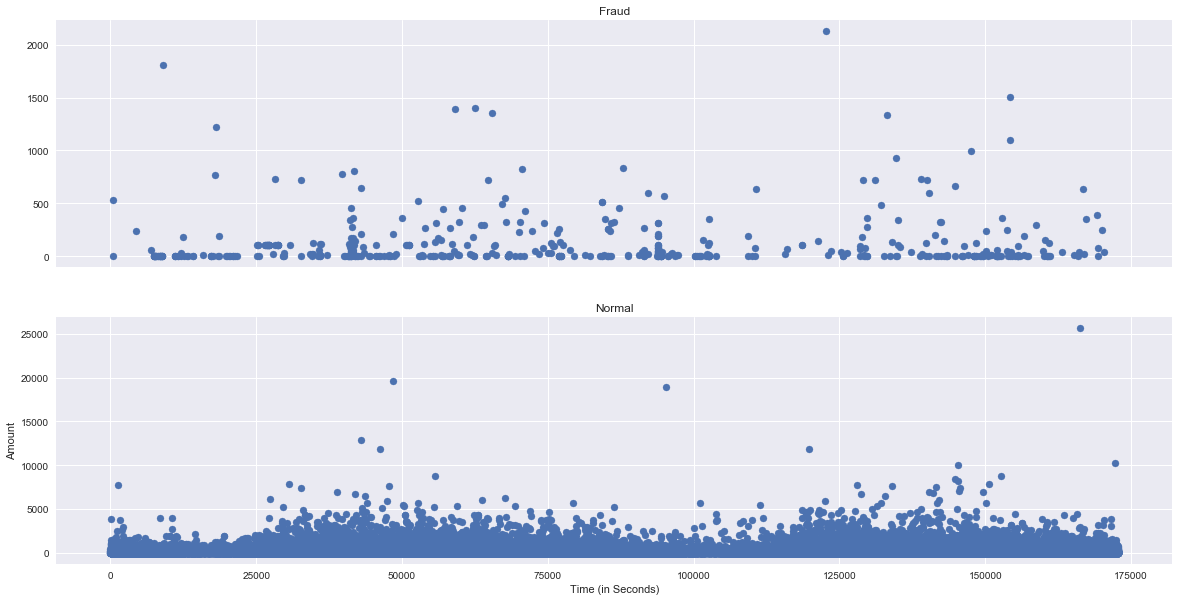

In [30]:
# checking Time vs Amount feature. scatter plot

fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

axis_1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
axis_1.set_title('Fraud')

axis_2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
axis_2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

#Data is everywhere in both cases. its not useful.

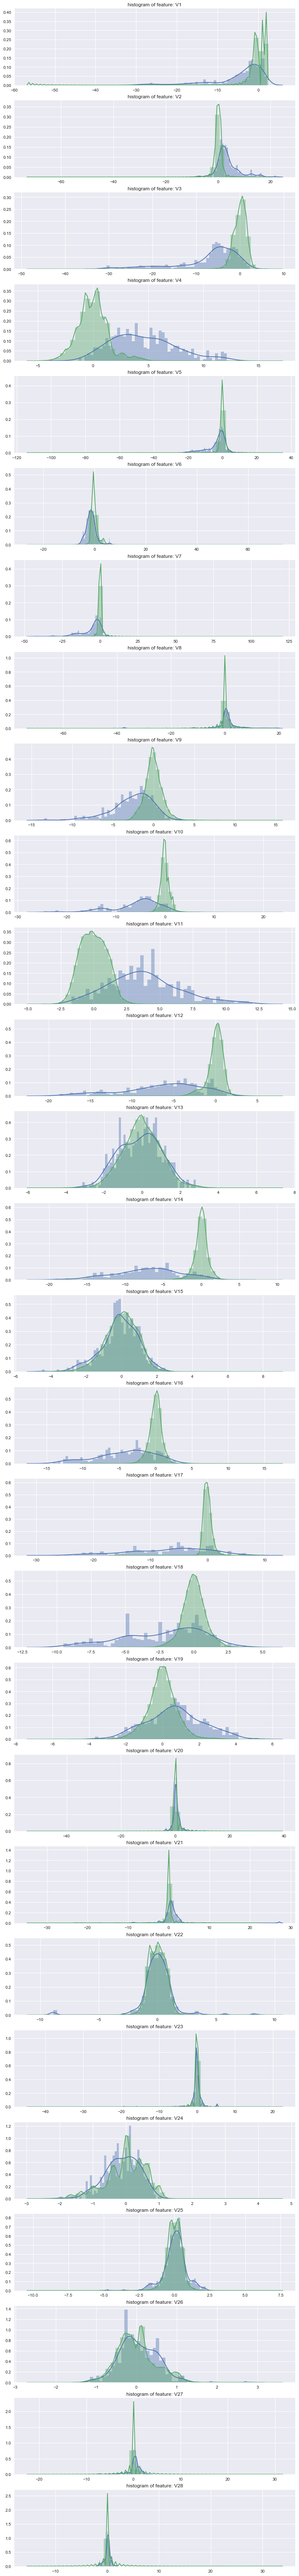

In [31]:
# getting all the V features
v_features = df.iloc[:,1:29].columns

#plotting histograms of all v_features (of fraud +normal) to check which of them are useful
# the more diff b/w fraud and normal = more important for learning

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50,label="Fraud")
    sns.distplot(df[cn][df.Class == 0], bins=50,label="Normal")
    ax.set_xlabel('')
    ax.set_title('histogram of feature: '+cn)
plt.show()

# we can see that some featuree's fraud and normal transaction histogram is similar so we will drop those features 
# to learning efficient and easy.


# we can see that some featuree's fraud and normal transaction histogram is similar so we will drop those features 
# to learning efficient and easy.

#V28 = Fraud and normal transaction hist is too similar so we will drop it
#V27 = Fraud and normal transaction hist is too similar so we will drop it
#V26 = Fraud and normal transaction hist is too similar so we will drop it
#V25 = Fraud and normal transaction hist is too similar so we will drop it
#V24 = Fraud and normal transaction hist is too similar so we will drop it
#V23 = Fraud and normal transaction hist is too similar so we will drop it
#V22 = Fraud and normal transaction hist is too similar so we will drop it
#V21 = Fraud and normal transaction hist are somewhat similar so we will try this this feature
#V20 = Fraud and normal transaction hist is too similar so we will drop it
#V19 = Fraud and normal transaction hist are Dissimilar, so we will use this feature
#V18 = Fraud and normal transaction hist are Dissimilar, so we will use this feature
#V17 = Fraud and normal transaction hist are Dissimilar, so we will use this feature
#V16 = Fraud and normal transaction hist are Dissimilar, so we will use this feature
#V15 = Fraud and normal transaction hist is too similar so we will drop it
#V14 = Fraud and normal transaction hist are Dissimilar, so we will use this feature
#V13 = Fraud and normal transaction hist is too similar so we will drop it
#V12 = Fraud and normal transaction hist are Dissimilar, so we will use this feature
#V11 = Fraud and normal transaction hist are Dissimilar, so we will use this feature
#V10 = Fraud and normal transaction hist are Dissimilar, so we will use this feature
#V9 = Fraud and normal transaction hist are Dissimilar, so we will use this feature
#V8 = Fraud and normal transaction hist is too similar so we will drop it
#V7 = Fraud and normal transaction hist are Dissimilar, so we will use this feature
#V6 = Fraud and normal transaction hist are somewhat similar so we will try this this feature
#V5 = Fraud and normal transaction hist are somewhat similar so we will try this this feature
#V4 = Fraud and normal transaction hist are Dissimilar, so we will use this feature
#V3 = Fraud and normal transaction hist are Dissimilar, so we will use this feature
#V2 = Fraud and normal transaction hist are somewhat similar so we will try this this feature
#V1 = Fraud and normal transaction hist are somewhat similar so we will try this this feature


# useful features = [ 3,4,7,9,10,11,12,14,16,17,18,19 ]
# Un useful Features = [ 8,13,15,20,22,23,24,25,26,27,28 ]
# Not sure about these features, have to test them out = [ 1,2,5,6,21 ]

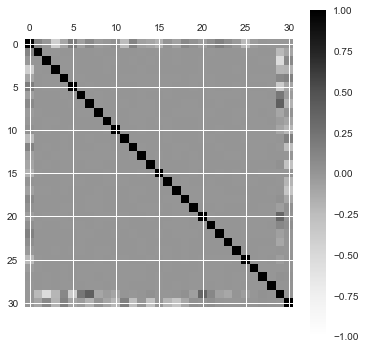

In [32]:
#Finding Corelation

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

# Logistic Regression

In [33]:
def ReadData(str):
    df = pd.read_csv(str)
    df.shape
    return df

In [34]:
def getxyFeatures(df,str):
    
    if(str=="amount"):
        # Only use the 'Amount' and 'V1', ..., 'V28' features
        features = ['Amount']  + ['V%d' % number for number in range(1, 29)]

    elif(str=="time"):
        # Only use the 'Time' and 'V1', ..., 'V28' features
        features = ['Time'] + ['V%d' % number for number in range(1, 29)]

    elif(str=="all"):
        # Only use the 'Amount' and 'V1', ..., 'V28' features
        features = ['Amount'] + ['Time'] + ['V%d' % number for number in range(1, 29)]

    elif(str=="useful"):
        # Only use the amount , time and useful features found in eda
        # useful features = [ 3,4,7,9,10,11,12,14,16,17,18,19 ]
        features = ['Amount'] + ['Time'] + ['V3'] + ['V4'] + ['V7'] + ['V9']+ ['V10'] + ['V11']+ ['V12'] + ['V14']+ ['V16'] + ['V17']+ ['V18'] + ['V19'] 

    elif(str=="maybeuseful"):
        # Only use the amount , time and useful features and features which we were not sure about found in eda
        # Not sure about these features, have to test them out = [ 1,2,5,6,21 ]
        # useful features = [ 3,4,7,9,10,11,12,14,16,17,18,19 ]
        features = ['Amount'] + ['Time'] + ['V1'] + ['V2'] + ['V5'] + ['V6']+ ['V21'] + ['V3'] + ['V4'] + ['V7'] + ['V9']+ ['V10'] + ['V11']+ ['V12'] + ['V14']+ ['V16'] + ['V17']+ ['V18'] + ['V19'] 


    # The target variable which we would like to predict, is the 'Class' variable
    target = 'Class'

    # Now create an X variable (containing the features) and an y variable (containing only the target variable)
    x = df[features]
    y = df[target]

    print("x.shape = ",x.shape)
    print("y.shape = ", y.shape)

    return x,y

In [35]:
# as we saw in the EDA that some of the variables have a wide range of values (like the Amount variable).
# In order to get all variables in an equivalent range, we subtract the mean and divide by the standard 
# deviation such that the distribution of the values is normalized.

def normalize(df):

    for feature in df.columns:
        df[feature] -= df[feature].mean()
        df[feature] /= df[feature].std()
        return df
    
    


In [36]:
# Define the splitter for splitting the data in a train set and a test set
def runit(x,y):
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=0)
    model = LogisticRegression()

    # Loop through the splits (only one)
    for train_indices, test_indices in splitter.split(x, y):
        # Select the train and test data
        X_train, y_train = x.loc[train_indices], y.loc[train_indices]
        X_test, y_test = x.loc[test_indices], y.loc[test_indices]

        # Normalizing the data
        X_train = normalize(X_train)
        X_test = normalize(X_test)

        # Fit and predict!
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # And finally, show the results
        print(classification_report(y_test, y_pred))


In [37]:
#df = ReadData("creditcard.csv")
x,y=getxyFeatures(df,"time")
runit(x,y)




x.shape =  (284807, 29)
y.shape =  (284807,)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71079
          1       0.88      0.65      0.75       123

avg / total       1.00      1.00      1.00     71202



In [38]:
''' all =
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      142158
          1       0.73      0.63      0.68        246

avg / total       1.00      1.00      1.00      142404
'''

''' amount =
                precision    recall  f1-score   support

          0       1.00       1.00      1.00      142158
          1       0.88       0.62      0.73        246

avg / total       1.00      1.00      1.00      142404
'''

''' time =
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71079
          1       0.88      0.65      0.75       123

avg / total       1.00      1.00      1.00     71202

'''

''' useful =
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    142158
          1       0.79      0.63      0.70       246

avg / total       1.00      1.00      1.00    142404
'''

''' maybeuseful =
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    142158
          1       0.75      0.58      0.65       246

avg / total       1.00      1.00      1.00    142404

'''


' maybeuseful =\n             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00    142158\n          1       0.75      0.58      0.65       246\n\navg / total       1.00      1.00      1.00    142404\n\n'

#  Random Forrest

In [39]:
# first we will balance the dataset
# undersampling the dataset

fraud_data = df[df['Class'] == 1]
normal_data = df[df['Class'] == 0]

fraud_percentage = len(fraud_data)/float(len(normal_data))

normal_undersampled = normal_data.sample(frac = fraud_percentage)
fraud_undersampled = fraud_data
Combined_Data = fraud_undersampled.append(normal_undersampled)


print("Undersampled Data :")
print("Percentage of Normal data in total undersample data  = " ,len(normal_undersampled)/len(Combined_Data) )
print("Percentage of Fraud data in total undersample data  = " ,len(fraud_undersampled)/len(Combined_Data) )
print("Percentage of Normal data in total undersample data  = " , len(Combined_Data) )


Undersampled Data :
Percentage of Normal data in total undersample data  =  0.5
Percentage of Fraud data in total undersample data  =  0.5
Percentage of Normal data in total undersample data  =  984


In [40]:
train_data, test_data = train_test_split(df,test_size=0.30)

train_matrix = train_data.as_matrix()
x_train = train_matrix[:,range(0,Class_Index-1)]
y_train = train_matrix[:,Class_Index]

test_matrix = test_data.as_matrix()
x_test = test_matrix[:,range(0,Class_Index-1)]
y_test = test_matrix[:,Class_Index]

print("shape of x_train = ",x_train.shape)
print("shape of y_train = ",y_train.shape)
print("shape of x_test = ",x_test.shape)
print("shape of y_test = ",y_test.shape)

print("To confirm , Total data rows = " , x_train.shape[0]+x_test.shape[0])
print("To confirm, original df rows = ", df.shape)

shape of x_train =  (199364, 29)
shape of y_train =  (199364,)
shape of x_test =  (85443, 29)
shape of y_test =  (85443,)
To confirm , Total data rows =  284807
To confirm, original df rows =  (284807, 31)


In [91]:

max_total = 0 
max_AUC = 0

Reg_Model = RandomForestClassifier(criterion='entropy',n_estimators=40,max_depth=28)
Reg_Model = Reg_Model.fit(x_train,y_train)

pred = Reg_Model.predict(x_test)

precision = round(precision_score(y_test, pred),2)
recall    = round(recall_score(y_test,pred),2)
total = precision+recall

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
AUC = round( auc(false_positive_rate, true_positive_rate) ,3)      

precision,recall,AUC



(0.99, 0.77, 0.886)

In [ ]:
# ran this model for several values of depths and n_estimators, below are the results. 
# the best we found was at depth 28 and n_estimator= 40, we got precision=99% , recall=77% , auc = 0.886


'''
At differnet depths:
at depth =  5   , precision =   0.96  , recall = 0.75  , total =  1.71  , max_total =  1.71  , auc =   0.875  , max_auc =  0.875 
at depth =  6   , precision =   0.98  , recall = 0.75  , total =  1.73  , max_total =  1.73  , auc =   0.875  , max_auc =  0.875 
at depth =  7   , precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.73  , auc =   0.882  , max_auc =  0.882 
at depth =  8   , precision =   0.97  , recall = 0.75  , total =  1.72  , max_total =  1.73  , auc =   0.875  , max_auc =  0.882 
at depth =  9   , precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.73  , auc =   0.882  , max_auc =  0.882 
at depth =  10  , precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.73  , auc =   0.882  , max_auc =  0.882 
at depth =  11  , precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.74  , auc =   0.882  , max_auc =  0.882 
at depth =  12  , precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.74  , auc =   0.882  , max_auc =  0.882 
at depth =  13  , precision =   0.96  , recall = 0.76  , total =  1.72  , max_total =  1.74  , auc =   0.879  , max_auc =  0.882 
at depth =  14  , precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.74  , auc =   0.879  , max_auc =  0.882 
at depth =  15  , precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.74  , auc =   0.879  , max_auc =  0.882 
at depth =  16  , precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.74  , auc =   0.882  , max_auc =  0.882
at depth =  17  , precision =   0.97  , recall = 0.74  , total =  1.71  , max_total =  1.74  , auc =   0.871  , max_auc =  0.882 
at depth =  18  , precision =   0.98  , recall = 0.74  , total =  1.72  , max_total =  1.74  , auc =   0.871  , max_auc =  0.882 
at depth =  19  , precision =   0.99  , recall = 0.75  , total =  1.74  , max_total =  1.74  , auc =   0.875  , max_auc =  0.882 
at depth =  20  , precision =   0.97  , recall = 0.74  , total =  1.71  , max_total =  1.74  , auc =   0.871  , max_auc =  0.882 
at depth =  21  , precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.74  , auc =   0.879  , max_auc =  0.882 
at depth =  22  , precision =   0.99  , recall = 0.76  , total =  1.75  , max_total =  1.75  , auc =   0.882  , max_auc =  0.882 
at depth =  23  , precision =   0.97  , recall = 0.77  , total =  1.74  , max_total =  1.75  , auc =   0.886  , max_auc =  0.886 
at depth =  24  , precision =   0.98  , recall = 0.75  , total =  1.73  , max_total =  1.75  , auc =   0.875  , max_auc =  0.886 
at depth =  25  , precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886 
at depth =  26  , precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886 
at depth =  27  , precision =   0.99  , recall = 0.75  , total =  1.74  , max_total =  1.75  , auc =   0.875  , max_auc =  0.886 
at depth =  28  , precision =   0.99  , recall = 0.77  , total =  1.76  , max_total =  1.75  , auc =   0.882  , max_auc =  0.886 
at depth =  29  , precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.882  , max_auc =  0.886 
at depth =  30  , precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.75  , auc =   0.882  , max_auc =  0.886 
at depth =  31  , precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886  
at depth =  32  , precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.75  , auc =   0.882  , max_auc =  0.886
at depth =  33  , precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.882  , max_auc =  0.886 
at depth =  34  , precision =   0.99  , recall = 0.75  , total =  1.74  , max_total =  1.75  , auc =   0.875  , max_auc =  0.886 
'''

####### good reuslt on depths : 

####### for p+r = depth : 28,22,

####### for auc = 23

In [ ]:
'''
at depth = 28
at n_estimator =  35  ,precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.73  , auc =   0.879  , max_auc =  0.879 
at n_estimator =  36  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.74  , auc =   0.879  , max_auc =  0.879 
at n_estimator =  37  ,precision =   0.99  , recall = 0.75  , total =  1.74  , max_total =  1.74  , auc =   0.875  , max_auc =  0.879 
at n_estimator =  38  ,precision =   0.98  , recall = 0.77  , total =  1.75  , max_total =  1.75  , auc =   0.886  , max_auc =  0.886 
at n_estimator =  39  ,precision =   0.99  , recall = 0.76  , total =  1.75  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886 
at n_estimator =  40  ,precision =   0.98  , recall = 0.77  , total =  1.75  , max_total =  1.75  , auc =   0.886  , max_auc =  0.886 
at n_estimator =  41  ,precision =   0.97  , recall = 0.77  , total =  1.74  , max_total =  1.75  , auc =   0.886  , max_auc =  0.886 
at n_estimator =  42  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886 
at n_estimator =  43  ,precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886 
at n_estimator =  44  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.882  , max_auc =  0.886  
at n_estimator =  45  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886 
at n_estimator =  46  ,precision =   0.98  , recall = 0.74  , total =  1.72  , max_total =  1.75  , auc =   0.868  , max_auc =  0.886 
at n_estimator =  47  ,precision =   0.99  , recall = 0.76  , total =  1.75  , max_total =  1.75  , auc =   0.882  , max_auc =  0.886 
at n_estimator =  48  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.882  , max_auc =  0.886 
at n_estimator =  49  ,precision =   0.99  , recall = 0.76  , total =  1.75  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886 
at n_estimator =  50  ,precision =   0.98  , recall = 0.74  , total =  1.72  , max_total =  1.75  , auc =   0.871  , max_auc =  0.886 
at n_estimator =  51  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886 
at n_estimator =  52  ,precision =   0.97  , recall = 0.75  , total =  1.72  , max_total =  1.75  , auc =   0.875  , max_auc =  0.886 
at n_estimator =  53  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886 
at n_estimator =  54  ,precision =   0.98  , recall = 0.74  , total =  1.72  , max_total =  1.75  , auc =   0.871  , max_auc =  0.886 
at n_estimator =  55  ,precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886 
at n_estimator =  56  ,precision =   0.98  , recall = 0.75  , total =  1.73  , max_total =  1.75  , auc =   0.875  , max_auc =  0.886 
at n_estimator =  57  ,precision =   0.98  , recall = 0.75  , total =  1.73  , max_total =  1.75  , auc =   0.875  , max_auc =  0.886 
at n_estimator =  58  ,precision =   0.98  , recall = 0.75  , total =  1.73  , max_total =  1.75  , auc =   0.875  , max_auc =  0.886 
at n_estimator =  59  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.882  , max_auc =  0.886 
at n_estimator =  60  ,precision =   0.98  , recall = 0.74  , total =  1.72  , max_total =  1.75  , auc =   0.871  , max_auc =  0.886 
at n_estimator =  61  ,precision =   0.97  , recall = 0.74  , total =  1.71  , max_total =  1.75  , auc =   0.871  , max_auc =  0.886 
at n_estimator =  62  ,precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886 
at n_estimator =  63  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886 
at n_estimator =  64  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886 
at n_estimator =  65  ,precision =   0.99  , recall = 0.76  , total =  1.75  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886 
at n_estimator =  66  ,precision =   0.99  , recall = 0.76  , total =  1.75  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886 
at n_estimator =  67  ,precision =   0.99  , recall = 0.75  , total =  1.74  , max_total =  1.75  , auc =   0.875  , max_auc =  0.886 
at n_estimator =  68  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886 
at n_estimator =  69  ,precision =   0.98  , recall = 0.75  , total =  1.73  , max_total =  1.75  , auc =   0.875  , max_auc =  0.886 
at n_estimator =  70  ,precision =   0.99  , recall = 0.76  , total =  1.75  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886  
at n_estimator =  71  ,precision =   0.98  , recall = 0.74  , total =  1.72  , max_total =  1.75  , auc =   0.871  , max_auc =  0.886 
at n_estimator =  72  ,precision =   0.97  , recall = 0.75  , total =  1.72  , max_total =  1.75  , auc =   0.875  , max_auc =  0.886 
at n_estimator =  73  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886
at n_estimator =  74  ,precision =   0.97  , recall = 0.75  , total =  1.72  , max_total =  1.75  , auc =   0.875  , max_auc =  0.886  
'''

#best result:
# at n_estimator =  40  ,precision =   0.98  , recall = 0.77  , total =  1.75  , max_total =  1.75  , auc =   0.886 


In [ ]:
'''
at depth = 23:

at n_estimator =  35  ,precision =   0.99  , recall = 0.76  , total =  1.75  , max_total =  1.75  , auc =   0.879  , max_auc =  0.879
at n_estimator =  36  ,precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.75  , auc =   0.882  , max_auc =  0.882
at n_estimator =  37  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.879  , max_auc =  0.882
at n_estimator =  38  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.882  , max_auc =  0.882
at n_estimator =  39  ,precision =   0.95  , recall = 0.75  , total =  1.70  , max_total =  1.75  , auc =   0.875  , max_auc =  0.882
at n_estimator =  40  ,precision =   0.99  , recall = 0.76  , total =  1.75  , max_total =  1.75  , auc =   0.879  , max_auc =  0.882
at n_estimator =  41  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.879  , max_auc =  0.882
at n_estimator =  42  ,precision =   0.97  , recall = 0.75  , total =  1.72  , max_total =  1.75  , auc =   0.875  , max_auc =  0.882
at n_estimator =  43  ,precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.75  , auc =   0.882  , max_auc =  0.882
at n_estimator =  44  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.882  , max_auc =  0.882
at n_estimator =  45  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.882  , max_auc =  0.882
at n_estimator =  46  ,precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.75  , auc =   0.879  , max_auc =  0.882
at n_estimator =  47  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.882  , max_auc =  0.882
at n_estimator =  48  ,precision =   0.98  , recall = 0.75  , total =  1.73  , max_total =  1.75  , auc =   0.875  , max_auc =  0.882
at n_estimator =  49  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.879  , max_auc =  0.882
at n_estimator =  50  ,precision =   0.99  , recall = 0.76  , total =  1.75  , max_total =  1.75  , auc =   0.879  , max_auc =  0.882
at n_estimator =  51  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.879  , max_auc =  0.882
at n_estimator =  52  ,precision =   0.98  , recall = 0.77  , total =  1.75  , max_total =  1.75  , auc =   0.886  , max_auc =  0.886
at n_estimator =  53  ,precision =   0.99  , recall = 0.76  , total =  1.75  , max_total =  1.75  , auc =   0.882  , max_auc =  0.886
at n_estimator =  54  ,precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886
at n_estimator =  55  ,precision =   0.97  , recall = 0.76  , total =  1.73  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886
at n_estimator =  56  ,precision =   0.97  , recall = 0.75  , total =  1.72  , max_total =  1.75  , auc =   0.875  , max_auc =  0.886
at n_estimator =  57  ,precision =   0.99  , recall = 0.76  , total =  1.75  , max_total =  1.75  , auc =   0.879  , max_auc =  0.886
at n_estimator =  58  ,precision =   0.98  , recall = 0.75  , total =  1.73  , max_total =  1.75  , auc =   0.875  , max_auc =  0.886
at n_estimator =  59  ,precision =   0.98  , recall = 0.76  , total =  1.74  , max_total =  1.75  , auc =   0.882  , max_auc =  0.8



'''

In [92]:
print( metrics.classification_report(y_test, pred) )


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     85303
        1.0       0.99      0.77      0.87       140

avg / total       1.00      1.00      1.00     85443



In [71]:
 # In the case of fradu detection what is more important is that we dont label fraud transactions as normal transaction
# (precision) compared to getting all the positive trnasactins (recall) so here by applying random foreest we get a
# precision of 100% for all normal trnasactions and 97% on fraudant transactions which is pretty good result

In [93]:
print( metrics.confusion_matrix(y_test, pred) )

''' confusion matrix:
           | Pred_No |  pred_Yes
----------------------------------    
Actual_No  |         |
Actual_Yes |         |

'''
''''''

[[85302     1]
 [   32   108]]


''

Area Under Curve (AUC) =  0.886


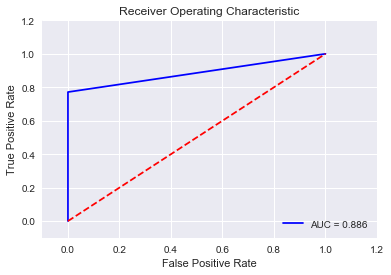

In [94]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
AreaUnderCurve = round( auc(false_positive_rate, true_positive_rate) ,3)

print('Area Under Curve (AUC) = ',AreaUnderCurve)

plt.title('Receiver Operating Characteristic')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %.3f'% AreaUnderCurve)

plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

In [95]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud

predS=pd.DataFrame(pred,dtype='int')
predS.columns=['pred']
print(pred.shape)


(85443,)


Pie Chart of Actual dataset:


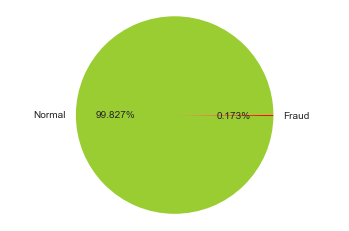

In [107]:
print("Pie Chart of Actual dataset:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.3f%%', labels=['Normal','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')


Pie Chart of predicted values:


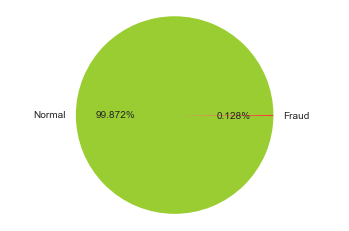

In [108]:
print("Pie Chart of predicted values:")
fig, ax = plt.subplots(1, 1)
ax.pie(predS.pred.value_counts(),autopct='%1.3f%%', labels=['Normal','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')